# WEEK 04
# Encounter 02 - Data Wrangling
# Project Challenge - Pivot Tables

## Task Description

Unlike in the gapminder datasets the bike dataset has many values in the dataframe. Use `pivot_table` to create a pivot table of traffic density over weekdays and/or hours. Identify confounding factors in the dataset (e.g. workdays vs weekdays). Create a notebook with your solution.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data file

bikes_wide = pd.read_csv('../data/bikes_with_bins.csv')
bikes_wide.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year,part_of_day
8007,2011-12-05 07:00:00,4,0,1,1,13.12,17.425,90,0.0000,9.0,274.0,283,7,December,Monday,2011,morning
1407,2011-03-03 22:00:00,1,0,1,1,8.20,12.880,40,0.0000,3.0,50.0,53,22,March,Thursday,2011,night
7750,2011-11-24 13:00:00,4,1,0,1,19.68,23.485,33,15.0013,NaN,NaN,416,13,November,Thursday,2011,afternoon
8285,2011-12-16 21:00:00,4,0,1,2,13.12,15.910,45,11.0014,7.0,95.0,102,21,December,Friday,2011,evening
3509,2011-05-31 03:00:00,2,0,1,2,26.24,28.030,94,0.0000,NaN,NaN,6,3,May,Tuesday,2011,night
16099,2012-11-08 13:00:00,4,0,1,1,18.04,21.970,18,27.9993,33.0,195.0,228,13,November,Thursday,2012,afternoon
8366,2011-12-20 06:00:00,4,0,1,2,14.76,18.940,57,0.0000,NaN,NaN,126,6,December,Tuesday,2011,morning
9094,2012-01-19 20:00:00,1,0,1,1,10.66,10.605,52,30.0026,7.0,184.0,191,20,January,Thursday,2012,evening
7859,2011-11-29 03:00:00,4,0,1,2,20.50,24.240,88,0.0000,NaN,NaN,8,3,November,Tuesday,2011,night
2336,2011-04-12 06:00:00,2,0,1,2,22.14,25.760,68,19.0012,3.0,55.0,58,6,April,Tuesday,2011,morning


In [3]:
bikes_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     17379 non-null  object 
 1   season       17379 non-null  int64  
 2   holiday      17379 non-null  int64  
 3   workingday   17379 non-null  int64  
 4   weather      17379 non-null  int64  
 5   temp         17379 non-null  float64
 6   atemp        17379 non-null  float64
 7   humidity     17379 non-null  int64  
 8   windspeed    17379 non-null  float64
 9   casual       10886 non-null  float64
 10  registered   10886 non-null  float64
 11  count        17379 non-null  int64  
 12  hour         17379 non-null  int64  
 13  month_name   17379 non-null  object 
 14  day_of_week  17379 non-null  object 
 15  year         17379 non-null  int64  
 16  part_of_day  17379 non-null  object 
dtypes: float64(5), int64(8), object(4)
memory usage: 2.3+ MB


In [12]:
bikes_wide['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [4]:
#bikes_wide. reset_index(inplace=True)
bikes_wide.reset_index()
bikes_wide

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,January,Saturday,2011,night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,January,Saturday,2011,night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,January,Saturday,2011,night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,January,Saturday,2011,night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,January,Saturday,2011,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,December,Monday,2012,evening
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,December,Monday,2012,evening
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,December,Monday,2012,evening
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,22,December,Monday,2012,night


In [5]:
bikes_wide['observation_id'] = bikes_wide.index

In [6]:
bikes_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        17379 non-null  object 
 1   season          17379 non-null  int64  
 2   holiday         17379 non-null  int64  
 3   workingday      17379 non-null  int64  
 4   weather         17379 non-null  int64  
 5   temp            17379 non-null  float64
 6   atemp           17379 non-null  float64
 7   humidity        17379 non-null  int64  
 8   windspeed       17379 non-null  float64
 9   casual          10886 non-null  float64
 10  registered      10886 non-null  float64
 11  count           17379 non-null  int64  
 12  hour            17379 non-null  int64  
 13  month_name      17379 non-null  object 
 14  day_of_week     17379 non-null  object 
 15  year            17379 non-null  int64  
 16  part_of_day     17379 non-null  object 
 17  observation_id  17379 non-null 

In [9]:
# checking if any particular day could be at the same time "workingday" and "holiday"
# RESULTS: no such records found
mask = (bikes_wide['holiday'] == 1) & (bikes_wide['workingday'] == 1)
bikes_wide[mask].shape

(0, 18)

### Example 1

In [13]:
# pivoting 'weekday' and 'hour'

bikes_wide_agg = pd.pivot_table(bikes_wide,
                                  columns = 'day_of_week',
                                  index = ['hour'],
                                  values = 'count',
                                  aggfunc = 'mean'
                                  )

In [14]:
bikes_wide_agg

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,52.336538,33.514286,97.114286,94.971154,40.757282,27.732673,35.509615
1,24.548077,17.942308,68.752381,76.096154,18.077670,13.130000,16.375000
2,13.288462,11.282828,49.447619,58.617647,10.676471,7.564356,9.401961
3,7.509804,6.422680,23.295238,28.365385,6.775510,5.184783,6.040404
4,6.762887,6.173469,9.514286,10.617647,6.310000,5.606061,5.364583
5,24.451923,20.692308,11.815534,12.051020,26.155340,22.653465,24.105769
6,96.317308,82.769231,25.257143,19.640777,109.194175,98.480392,102.692308
7,265.586538,238.144231,51.552381,39.800000,310.213592,274.647059,287.836538
8,482.942308,394.846154,120.238095,87.676190,499.796117,440.794118,470.759615


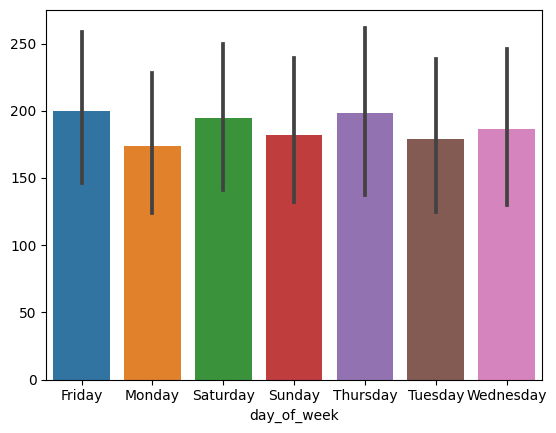

In [24]:
# plotting smth strange..
sns.barplot(data=bikes_wide_agg);

<AxesSubplot: xlabel='hour'>

<Figure size 1200x480 with 0 Axes>

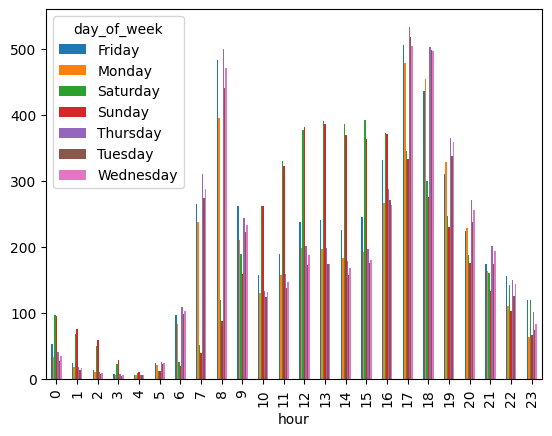

In [26]:
# ploting again
plt.figure(figsize=(12, 4.8))
bikes_wide_agg.plot(kind='bar')

### Example 2

In [27]:
# pivoting 'weekday' and 'hour'

bikes_agg_2 = pd.pivot_table(bikes_wide,
                                  columns = 'part_of_day',
                                  index = ['day_of_week'],
                                  values = 'count',
                                  aggfunc = 'mean'
                                  )

In [28]:
bikes_agg_2

part_of_day,afternoon,evening,morning,night
day_of_week,,,,
Friday,309.928846,286.319712,241.592033,50.874848
Monday,263.532692,293.711538,201.754121,34.314110
Saturday,377.735238,223.552885,193.853061,65.230861
Sunday,364.678095,204.000000,182.130969,56.836165
Thursday,279.253385,335.408654,236.603329,45.572827
Tuesday,259.105769,311.930288,210.194406,36.266833
Wednesday,258.269231,326.320388,222.958791,40.933742


In [36]:
# changing columns order to have meaningful part_of_day order
bikes_agg_2 = bikes_agg_2[['morning', 'afternoon', 'evening', 'night']]
bikes_agg_2

part_of_day,morning,afternoon,evening,night
day_of_week,,,,
Friday,241.592033,309.928846,286.319712,50.874848
Monday,201.754121,263.532692,293.711538,34.314110
Saturday,193.853061,377.735238,223.552885,65.230861
Sunday,182.130969,364.678095,204.000000,56.836165
Thursday,236.603329,279.253385,335.408654,45.572827
Tuesday,210.194406,259.105769,311.930288,36.266833
Wednesday,222.958791,258.269231,326.320388,40.933742


<AxesSubplot: xlabel='day_of_week'>

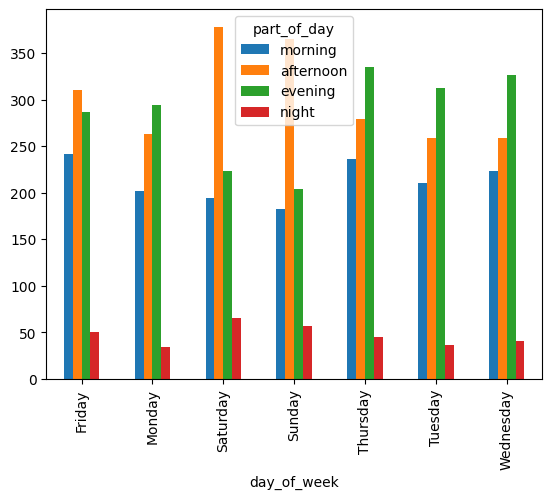

In [37]:
# plotting
bikes_agg_2.plot(kind='bar')

### Example 3

In [38]:
# pivoting 'weekday' and 'hour'

bikes_agg_3 = pd.pivot_table(bikes_wide,
                                  columns = 'part_of_day',
                                  index = ['season'],
                                  values = 'count',
                                  aggfunc = 'mean'
                                  )
bikes_agg_3

part_of_day,afternoon,evening,morning,night
season,,,,
1,173.685144,150.094444,128.051875,24.619605
2,334.602174,318.820652,226.934006,49.774744
3,359.736170,377.046791,254.950570,64.530476
4,337.543503,281.012712,238.582792,48.303483


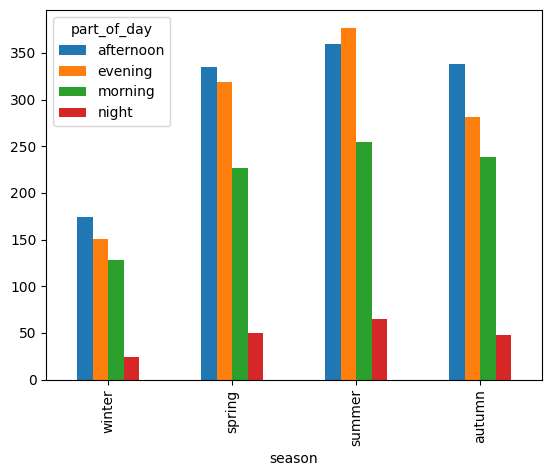

In [67]:
# season==1 is 'winter', season==2 is 'spring', season==3 is 'summer', season==4 is 'autumn'

bikes_agg_3.plot(kind='bar').set_xticklabels(['winter', 'spring', 'summer', 'autumn']);

In [40]:
# getting seasons encoding description(set of Months)
bikes_wide[bikes_wide['season'] == 1]['month_name'].unique()

array(['January', 'February', 'March', 'December'], dtype=object)

In [41]:
bikes_wide[bikes_wide['season'] == 2]['month_name'].unique()

array(['March', 'April', 'May', 'June'], dtype=object)

In [42]:
bikes_wide[bikes_wide['season'] == 3]['month_name'].unique()

array(['June', 'July', 'August', 'September'], dtype=object)

In [43]:
bikes_wide[bikes_wide['season'] == 4]['month_name'].unique()

array(['September', 'October', 'November', 'December'], dtype=object)

In [44]:
# makind 'datetime' as datetyme dtype
bikes_wide['datetime'] = pd.to_datetime(bikes_wide['datetime'])

In [58]:
# December, March, June and September refer to a few seasons at the same time
# Its because of each season starts in the middle of a month (on 21st)
# (see typical season borders below)

In [54]:
# season 1
mask1 = (bikes_wide['season'] == 1) & (bikes_wide['datetime'] > '2011-06-01')
mask2 = (bikes_wide['season'] == 1) & (bikes_wide['datetime'] < '2012-06-01')

bikes_wide[mask1]['datetime'].min(), bikes_wide[mask2]['datetime'].max()

(Timestamp('2011-12-21 00:00:00'), Timestamp('2012-03-20 23:00:00'))

In [45]:
# season 2
bikes_wide[bikes_wide['season'] == 2]['datetime'].min(), bikes_wide[bikes_wide['season'] == 2]['datetime'].max()

(Timestamp('2011-03-21 00:00:00'), Timestamp('2012-06-20 23:00:00'))

In [56]:
# season 3
bikes_wide[bikes_wide['season'] == 3]['datetime'].min(), bikes_wide[bikes_wide['season'] == 3]['datetime'].max()

(Timestamp('2011-06-21 00:00:00'), Timestamp('2012-09-22 23:00:00'))

In [57]:
# season 4
bikes_wide[bikes_wide['season'] == 4]['datetime'].min(), bikes_wide[bikes_wide['season'] == 4]['datetime'].max()

(Timestamp('2011-09-23 00:00:00'), Timestamp('2012-12-20 23:00:00'))